In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
class risk_ratios:
    def __init__(self,data,benchmark,weights):
        self.benchmark=benchmark
        self.data=data
        self.weights=weights
    def ratios(self,rf):
        import numpy as np
        import pandas as pd
        returns_port=self.data.pct_change().dropna()
        returns_bench=self.benchmark.pct_change().dropna()
        mean_port=returns_port.mean()
        mean_bench=returns_bench.mean()
        desv_port=returns_port.std()
        desv_bench=returns_bench.std()
        mean2_port=np.array(mean_port)
        desv2_port=np.array(desv_port)
        weightss=np.array(self.weights)
        expected_return=np.dot(np.transpose(weightss),mean2_port)
        # Sharpe
        sharpe=(mean_port-rf)/desv_port
        # M2
        m2=(sharpe*desv_bench[0])+rf
        # beta
        beta=[]
        for t in self.data.columns:
            cov=np.cov(returns_port[t],returns_bench.iloc[:,0])[0][1]
            beta.append(cov/desv_bench[0]**2)
        beta=pd.Series(beta)
        beta.index=mean_port.index
        # Treynor
        treynor=(mean_port-rf)/beta
        # Retorno CAPM
        capm=rf+(beta*(mean_bench[0]-rf))
        # Jensen Alfa
        alfa=expected_return-capm
        # Information Ratio
        info_ratio=mean_bench/desv_bench
        print("The information ratio is "+str(info_ratio[0])+".")
        return sharpe,m2,beta,treynor,capm,alfa

In [6]:
import pandas as pd
equity=pd.read_excel("portafolioo.xlsx",sheet_name="Hoja1",index_col=0)
benchmark=pd.read_excel("portafolioo.xlsx",sheet_name="Hoja2",index_col=0)
weights=pd.read_excel("portafolioo.xlsx",sheet_name="Hoja3")
equity.head()

,AMERICAN EXPRESS CO,VERIZON COMMUNICATIONS INC,BOEING CO/THE,CATERPILLAR INC,JPMORGAN CHASE & CO,COCA-COLA CO/THE,WALT DISNEY CO/THE,HP INC,JOHNSON & JOHNSON,MCDONALD'S CORP,...,STARBUCKS CORP,STATE STREET CORP,DOMINO'S PIZZA INC,AMAZON.COM INC,NETFLIX INC,MASTERCARD INC - A,PEPSICO INC,UNITED AIRLINES HOLDINGS INC,DELTA AIR LINES INC,ACTIVISION BLIZZARD INC
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,40.5200,30.9563,54.13,56.990,41.6700,28.500,32.25,23.3858,64.41,62.44,...,11.530,43.5499,8.38,6.726,7.870,25.598,60.80,12.91,11.38,11.110
2010-01-08,42.1299,30.1084,61.60,60.340,44.7321,27.575,31.88,23.8762,64.21,61.84,...,11.640,45.5204,9.37,6.676,7.614,25.413,60.77,13.33,12.47,10.900
2010-01-15,42.5718,28.9988,60.82,60.540,43.7310,28.145,30.60,23.8217,64.56,62.28,...,11.635,42.6797,11.33,6.357,7.279,26.280,62.29,13.25,12.74,10.890
2010-01-22,38.7555,28.7713,57.77,54.629,39.2057,27.120,29.98,22.3780,63.20,63.39,...,11.455,43.3699,11.07,6.072,7.270,25.196,60.39,13.21,13.29,10.365
2010-01-29,37.8215,27.8988,60.60,52.605,38.9854,27.125,29.55,21.3701,62.86,62.43,...,10.895,42.8898,11.30,6.271,8.893,25.005,59.62,12.23,12.23,10.160


In [7]:
benchmark.head()

,DOW JONES INDUS. AVG
Dates,
2010-01-01,10428.05
2010-01-08,10618.19
2010-01-15,10609.65
2010-01-22,10172.98
2010-01-29,10067.33


In [9]:
weights.index=equity.columns
weights.head()

,Pesos
AMERICAN EXPRESS CO,0.008171
VERIZON COMMUNICATIONS INC,0.048271
BOEING CO/THE,0.009887
CATERPILLAR INC,0.000883
JPMORGAN CHASE & CO,0.000583


In [50]:
rf_anual=0.03
rf_sem=(1+rf_anual)**(1/52)-1
objeto=risk_ratios(equity,benchmark,weights)
sharpe,m2,beta,treynor,capm,alfa=objeto.ratios(rf_sem)

The information ratio is 0.0825221997819158.


In [24]:
# Sharpe ratio
sharpe.head()

AMERICAN EXPRESS CO           0.061310
VERIZON COMMUNICATIONS INC    0.056250
BOEING CO/THE                 0.049811
CATERPILLAR INC               0.065671
JPMORGAN CHASE & CO           0.057429
dtype: float64

In [18]:
# Modigliani - Miller
m2.head()

AMERICAN EXPRESS CO           0.001969
VERIZON COMMUNICATIONS INC    0.001853
BOEING CO/THE                 0.001706
CATERPILLAR INC               0.002069
JPMORGAN CHASE & CO           0.001880
dtype: float64

In [19]:
# Beta
beta.head()

AMERICAN EXPRESS CO           1.369157
VERIZON COMMUNICATIONS INC    0.510947
BOEING CO/THE                 1.858612
CATERPILLAR INC               1.227398
JPMORGAN CHASE & CO           1.267063
dtype: float64

In [20]:
# Treynor ratio
treynor.head()

AMERICAN EXPRESS CO           0.001825
VERIZON COMMUNICATIONS INC    0.002592
BOEING CO/THE                 0.001563
CATERPILLAR INC               0.002135
JPMORGAN CHASE & CO           0.001704
dtype: float64

In [22]:
# Capital Asset Pricing Model
capm.head()

AMERICAN EXPRESS CO           0.002371
VERIZON COMMUNICATIONS INC    0.001241
BOEING CO/THE                 0.003015
CATERPILLAR INC               0.002184
JPMORGAN CHASE & CO           0.002237
dtype: float64

In [23]:
# Jensen Alfa
alfa.head()

AMERICAN EXPRESS CO           0.000765
VERIZON COMMUNICATIONS INC    0.001894
BOEING CO/THE                 0.000120
CATERPILLAR INC               0.000951
JPMORGAN CHASE & CO           0.000899
dtype: float64

In [32]:
market_returns=np.array(benchmark.pct_change().dropna())
market_returns=np.reshape(market_returns,newshape=(650))
american_exp=np.array(equity["AMERICAN EXPRESS CO"].pct_change().dropna())
american_exp=np.reshape(american_exp,newshape=(650))
beta_2=np.polyfit(market_returns,american_exp,deg=1)

In [34]:
beta_2

array([1.36915652e+00, 4.86856018e-04])

In [41]:
predict_amer=(market_returns*beta_2[0])+beta_2[1]
predict_amer[0:5]


array([ 0.02545139, -0.00061433, -0.05586463, -0.01373232, -0.00700674])

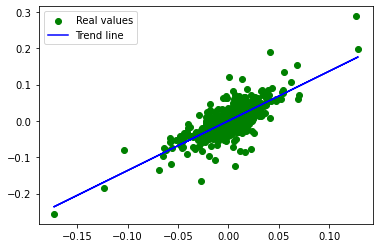

In [45]:
plt.scatter(market_returns,american_exp,c="green",label="Real values")
plt.plot(market_returns,predict_amer,c="blue",label="Trend line")
plt.legend()
plt.show()